In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-li_s18h1
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-li_s18h1
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179812 sha256=c733bc60ab110b8d6a019fc2f4a4fd31845a11e07c1a6eaf890f2ca0f365775f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhslytjc/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow

In [3]:
X = np.load('../content/images32_32.npy')
y = np.load('../content/labels32_32.npy')

In [4]:
tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1-tain_size, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=valid_test_split, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(7010, 32, 32, 3) (7010, 7)
(1503, 32, 32, 3) (1503, 7)
(1502, 32, 32, 3) (1502, 7)


In [5]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)      
  ]

In [6]:
histories = {}

In [9]:
img_height = 32
img_width = 32
channels = 3
img_shape = (img_height, img_width, channels)

In [10]:
# Create the base model with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

In [ ]:
base_model.summary()

In [12]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [14]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [15]:
prediction_layer = keras.layers.Dense(7, activation='softmax')

In [16]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer                           
])

In [ ]:
model.summary()

In [18]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
loss0, accuracy0 = model.evaluate(X_val, y_val, steps = 20)

20/20 [==============================] - 3s 56ms/step - loss: 1.9739 - accuracy: 0.0513


In [20]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
220/220 [==============================] - 11s 37ms/step - loss: 1.6882 - accuracy: 0.6375 - val_loss: 1.4789 - val_accuracy: 0.6565
Epoch 2/40
220/220 [==============================] - 9s 40ms/step - loss: 1.3407 - accuracy: 0.6726 - val_loss: 1.2577 - val_accuracy: 0.6565
Epoch 3/40
220/220 [==============================] - 8s 36ms/step - loss: 1.1899 - accuracy: 0.6726 - val_loss: 1.1783 - val_accuracy: 0.6565
Epoch 4/40
220/220 [==============================] - 8s 36ms/step - loss: 1.1381 - accuracy: 0.6726 - val_loss: 1.1528 - val_accuracy: 0.6565
Epoch 5/40
220/220 [==============================] - 8s 36ms/step - loss: 1.1206 - accuracy: 0.6726 - val_loss: 1.1427 - val_accuracy: 0.6565
Epoch 6/40
220/220 [==============================] - 8s 37ms/step - loss: 1.1127 - accuracy: 0.6726 - val_loss: 1.1380 - val_accuracy: 0.6565
Epoch 7/40
220/220 [==============================] - 8s 37ms/step - loss: 1.1084 - accuracy: 0.6726 - val_loss: 1.1350 - val_accuracy: 0.656

In [21]:
histories['MobileNetV2'] = history

(0.0, 1.0)

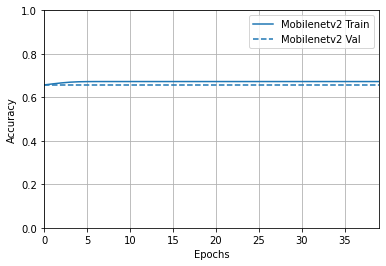

In [22]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])